In [45]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [46]:
def calculate_mse(y_true, y_pred):
    n = len(y_true)
    mse = np.mean((y_pred - y_true)**2)
    return mse


def compress_image(image_path, k):
    img = Image.open(image_path)
    img_array = np.array(img)
    img_flat = img_array.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(img_flat)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    compressed_img_flat = centers[labels]
    compressed_img_array = compressed_img_flat.reshape(img_array.shape)
    compressed_img = Image.fromarray(np.uint8(compressed_img_array))
    return compressed_img

In [47]:
original_image = Image.open('data/forest.jpg')
original_array = np.array(original_image)
mse_values = []
k_values = range(1, 31)

for k in k_values:
    compressed_image = compress_image('data/forest.jpg', k)
    compressed_array = np.array(compressed_image)
    mse = calculate_mse(original_array, compressed_array)
    mse_values.append(mse)

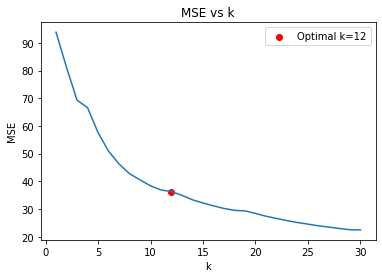

In [52]:
# Find the optimal k using the Elbow Method
optimal_k = 0
prev_mse = mse_values[0]
k_threshold = 1
for k, mse in enumerate(mse_values, start=2):
    # Check if MSE stops decreasing significantly
    if k > 2 and  prev_mse - mse < k_threshold:
        break
    prev_mse = mse
    optimal_k = k

# Plot the MSE vs k
plt.plot(k_values, mse_values)
plt.scatter(optimal_k, mse_values[optimal_k - 1], color='red', label=f'Optimal k={optimal_k}')
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('MSE vs k')
plt.legend()

plt.show()

In [53]:
mse_values

[93.83229508196722,
 81.11734342160571,
 69.32670239596469,
 66.61060739806642,
 57.621179066834806,
 50.898548759983186,
 46.256575241698194,
 42.76497793190416,
 40.53441677175284,
 38.378726355611605,
 36.86745376208491,
 36.29489911727617,
 34.937999159310635,
 33.325853299705756,
 32.17346258932324,
 31.13505359394704,
 30.196784363177805,
 29.519056326187474,
 29.310569567044976,
 28.42510508617066,
 27.39145018915511,
 26.605081967213113,
 25.827607187894074,
 25.12198087431694,
 24.546709751996637,
 23.92194094157209,
 23.47336485918453,
 22.954584909625893,
 22.52255884825557,
 22.45190941572089]

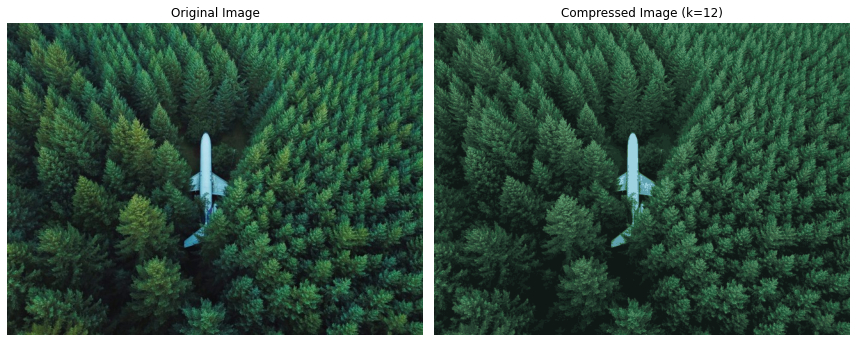

In [54]:
# Display the original and compressed images for the optimal k
original_image = Image.open('data/forest.jpg')
original_array = np.array(original_image)

# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 12))

# Plot the original image
axs[0].imshow(original_array)
axs[0].axis('off')
axs[0].set_title('Original Image')

# Plot the compressed image for the optimal k
compressed_image_optimal = compress_image('data/forest.jpg', optimal_k)
compressed_array_optimal = np.array(compressed_image_optimal)
axs[1].imshow(compressed_array_optimal)
axs[1].axis('off')
axs[1].set_title(f'Compressed Image (k={optimal_k})')

plt.tight_layout()
plt.show()